In [4]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Loading and Preprocessing

##Load Data

In [6]:
df = pd.read_csv('FILE PATH', encoding= 'latin1')

In [7]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
df.shape

(8760, 14)

##Rename Column Names

In [10]:
df.columns = [
    'Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
    'Wind_Speed', 'Visibility', 'Dew_Point_Temp', 'Solar_Radiation',
    'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'
]

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') #Converting 'Date' columns to datetime object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8760 non-null   datetime64[ns]
 1   Rented_Bike_Count  8760 non-null   int64         
 2   Hour               8760 non-null   int64         
 3   Temperature        8760 non-null   float64       
 4   Humidity           8760 non-null   int64         
 5   Wind_Speed         8760 non-null   float64       
 6   Visibility         8760 non-null   int64         
 7   Dew_Point_Temp     8760 non-null   float64       
 8   Solar_Radiation    8760 non-null   float64       
 9   Rainfall           8760 non-null   float64       
 10  Snowfall           8760 non-null   float64       
 11  Seasons            8760 non-null   object        
 12  Holiday            8760 non-null   object        
 13  Functioning_Day    8760 non-null   object        
dtypes: datet

In [13]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temp,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [14]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
df.duplicated().sum()

np.int64(0)

## Date Feature Extraction

In [16]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0: Monday, 6: Sunday

In [17]:
df.drop('Date', axis = 1, inplace = True) # Drop the original 'Date' column as it's no longer needed for regression

In [18]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temp,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Year,DayOfWeek
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,4


##Split the Data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
target = 'Rented_Bike_Count'
X = df.drop(target, axis = 1)
y = df[target]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
print(f"X_train shape: {X_train.shape}", f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}", f"y_test shape: {y_test.shape}")


print(X_train[['Month', 'Year', 'DayOfWeek']].head())

X_train shape: (7008, 15) X_test shape: (1752, 15)
y_train shape: (7008,) y_test shape: (1752,)
      Month  Year  DayOfWeek
8415     11  2018          4
5049      6  2018          4
8395     11  2018          3
1535      2  2018          4
5518      7  2018          2


#EDA

##Visualisation with Plots

In [23]:
train_df = X_train.copy()
train_df['Rented_Bike_Count'] = y_train

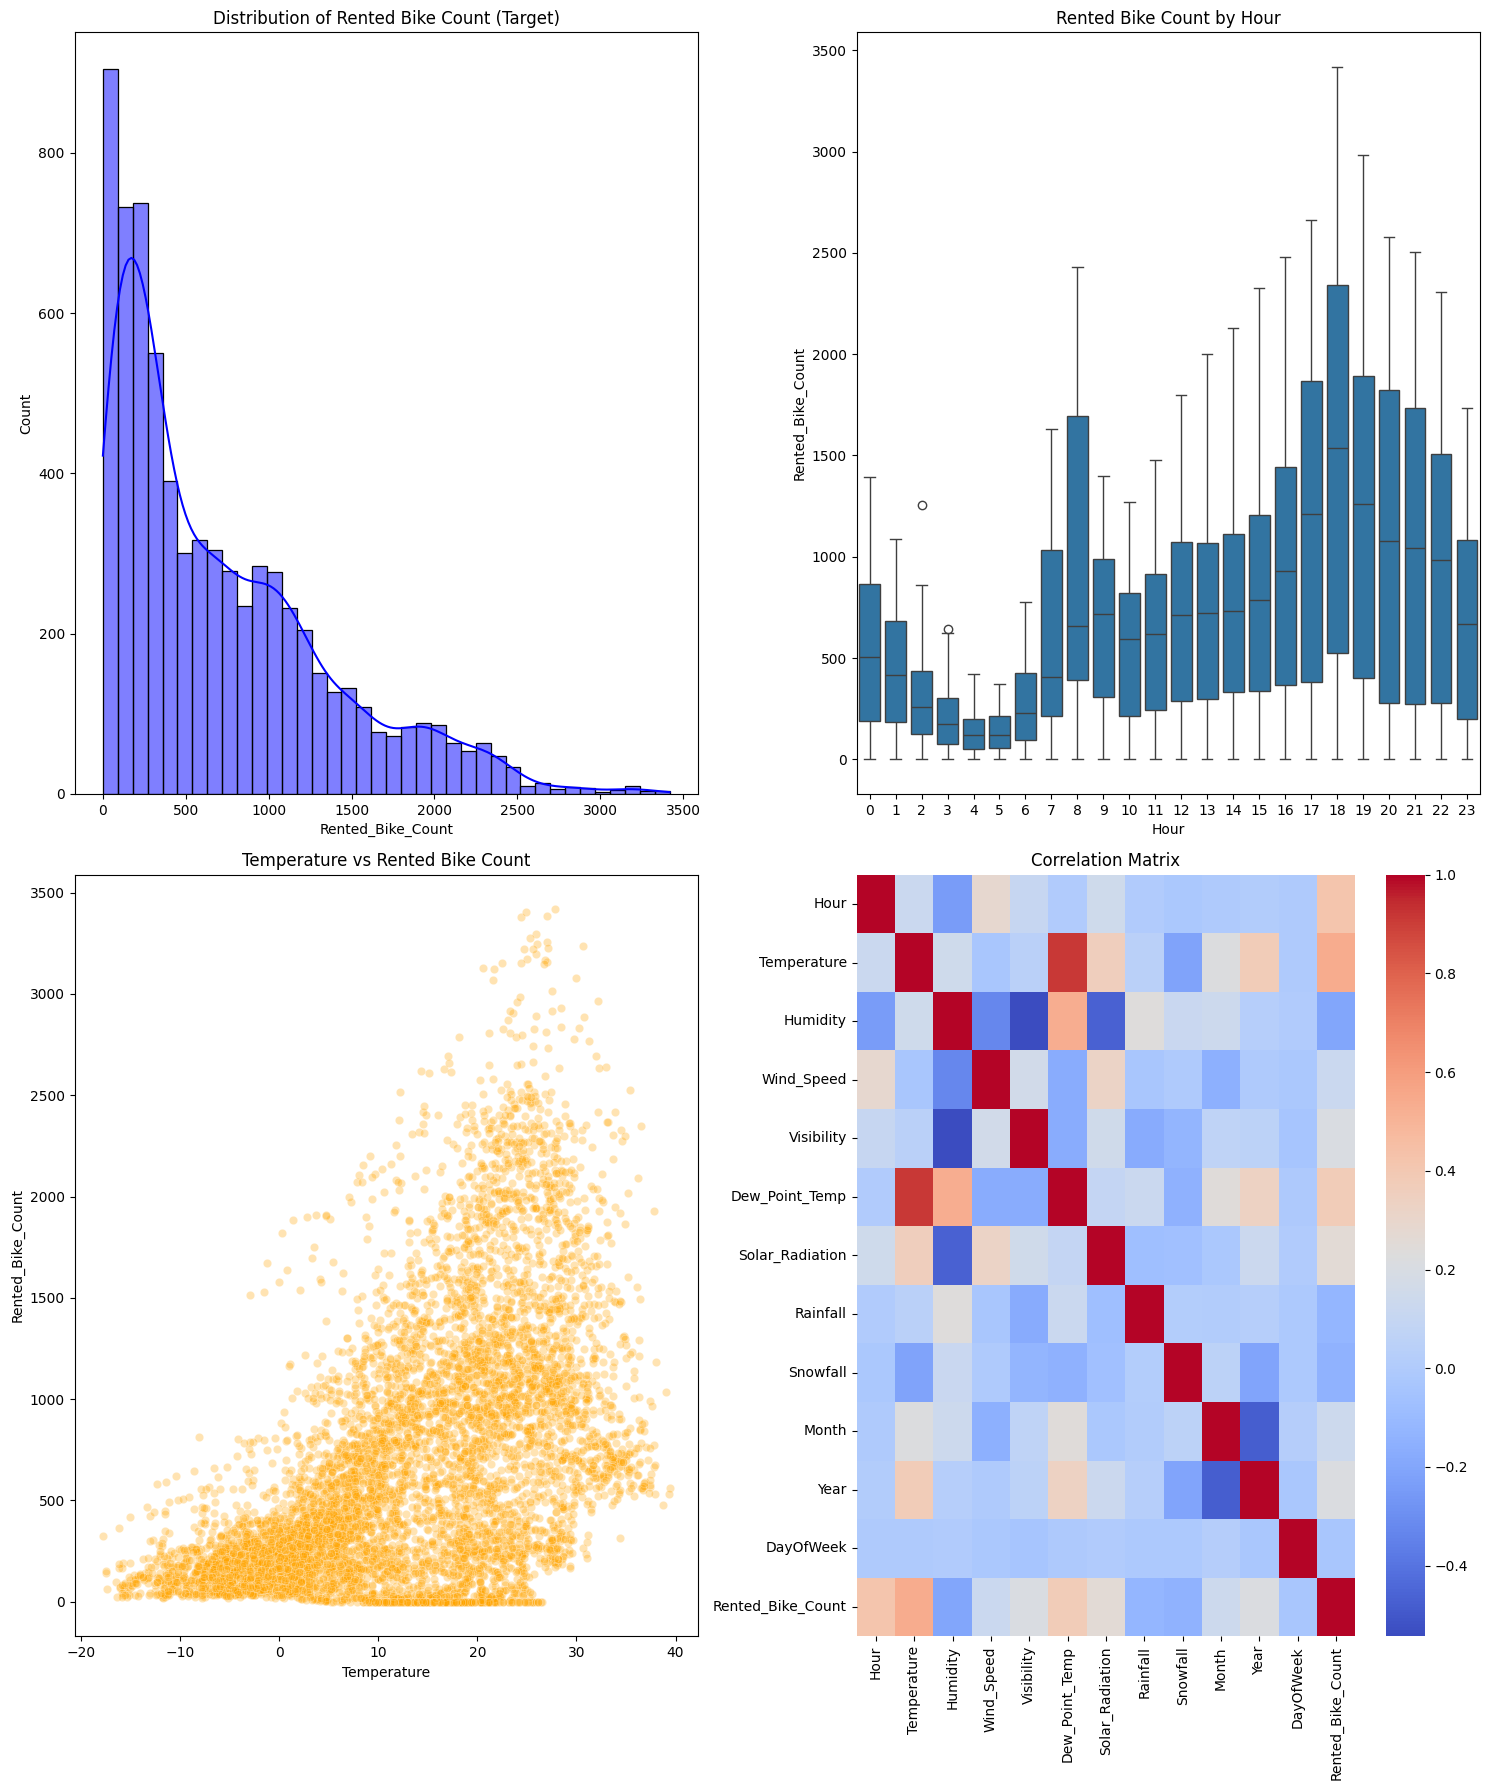

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 18))

sns.histplot(train_df['Rented_Bike_Count'], kde=True, ax=axes[0, 0], color='blue') #Target Distribution
axes[0, 0].set_title('Distribution of Rented Bike Count (Target)')

sns.boxplot(x='Hour', y='Rented_Bike_Count', data=train_df, ax=axes[0, 1]) ## Hour vs Bike Count (Boxplot to see variance)
axes[0, 1].set_title('Rented Bike Count by Hour')

sns.scatterplot(x='Temperature', y='Rented_Bike_Count', data=train_df, alpha=0.3, ax=axes[1, 0], color='orange') #Temperature vs Bike Count (Scatter Plot)
axes[1, 0].set_title('Temperature vs Rented Bike Count')

numeric_cols = train_df.select_dtypes(include=[np.number]).columns # Correlation Matrix (Heatmap), selected only numeric columns for correlation
corr_matrix = train_df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [25]:
train_df[numeric_cols].corr()

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temp,Solar_Radiation,Rainfall,Snowfall,Month,Year,DayOfWeek,Rented_Bike_Count
Hour,1.000000,0.125227,-0.243314,0.288539,0.102981,0.002592,0.146127,0.004201,-0.019858,-0.002204,0.006912,-0.004186,0.418294
Temperature,0.125227,1.000000,0.149517,-0.036032,0.043033,0.910899,0.355545,0.046960,-0.217199,0.218340,0.376841,-0.004972,0.537088
Humidity,-0.243314,0.149517,1.000000,-0.326216,-0.543001,0.532210,-0.464948,0.238423,0.114999,0.136145,0.027622,0.003837,-0.202004
Wind_Speed,0.288539,-0.036032,-0.326216,1.000000,0.161946,-0.173326,0.322930,-0.031519,-0.000853,-0.156053,-0.002490,-0.023485,0.121388
Visibility,0.102981,0.043033,-0.543001,0.161946,1.000000,-0.171240,0.152554,-0.180778,-0.127903,0.070537,0.056466,-0.038008,0.204672
Dew_Point_Temp,0.002592,0.910899,0.532210,-0.173326,-0.171240,1.000000,0.093442,0.124393,-0.147138,0.243622,0.333460,-0.010735,0.377737
Solar_Radiation,0.146127,0.355545,-0.464948,0.322930,0.152554,0.093442,1.000000,-0.074973,-0.072390,-0.023876,0.128167,0.005268,0.258930
Rainfall,0.004201,0.046960,0.238423,-0.031519,-0.180778,0.124393,-0.074973,1.000000,0.014839,0.008406,0.026667,-0.012888,-0.123586
Snowfall,-0.019858,-0.217199,0.114999,-0.000853,-0.127903,-0.147138,-0.072390,0.014839,1.000000,0.059242,-0.209721,-0.012679,-0.141440
Month,-0.002204,0.218340,0.136145,-0.156053,0.070537,0.243622,-0.023876,0.008406,0.059242,1.000000,-0.480617,0.022264,0.136238


###EDA Insights

* **Target Skewness:** The `Rented_Bike_Count` distribution is **right-skewed**. To satisfy the normality assumption of Linear Regression, we will apply a **Log Transformation (`np.log1p`)**.
* **Multicollinearity:** There is a strong correlation between `Temperature` and `Dew_Point_Temp`. While this hurts standard OLS, **Regularization models (Ridge/Lasso)** will be used to handle this redundancy effectively.

#Preprocessing

##Log Transformation & Column Transformer

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

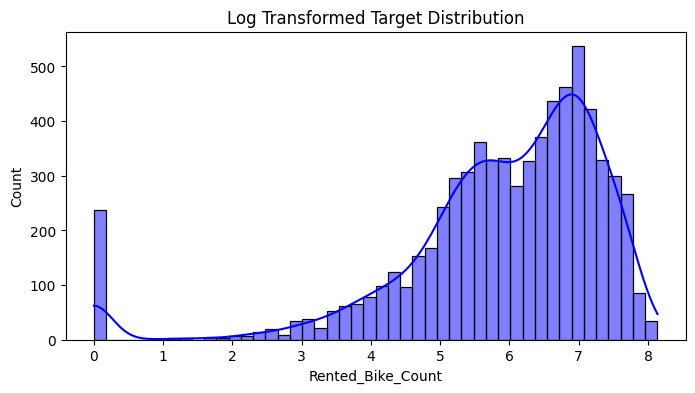

In [27]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

plt.figure(figsize = (8,4))
sns.histplot(y_train_log, kde = True, color = 'blue')
plt.title('Log Transformed Target Distribution')
plt.show()

##Preprocessor Function

In [28]:
def get_processor():

  """
  Creates a ColumnTransformer to handle:
  -Numerical: StandardScaling
  -Categorical: OneHotEncodinga

  """
  numeric_features = ['Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
                    'Dew_Point_Temp', 'Solar_Radiation', 'Rainfall', 'Snowfall'
                    ]
  categorical_features = ['Seasons', 'Holiday', 'Functioning_Day', 'Hour', 'Month','DayOfWeek', 'Year']

  preprocessor = ColumnTransformer(
      transformers = [
          ('num', StandardScaler(), numeric_features),
          ('cat', OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False), categorical_features)
      ],
      verbose_feature_names_out=False
  )
  return preprocessor

We implemented a modular preprocessing pipeline using a custom function to ensure code reusability and cleanliness. For categorical variables like seasons, we utilized **One-Hot Encoding** instead of Label Encoding because Linear Regression interprets numerical labels (e.g., 1, 2, 3) as a mathematical hierarchy, which is incorrect for non-ordinal data. Additionally, we applied `drop='first'` to remove redundant categories, effectively preventing the **Dummy Variable Trap** (multicollinearity) and ensuring model stability.

##Apply Preprocessor

In [29]:
preprocessor = get_processor()

##Fit on Train, Transform Train & Test

In [30]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

##Convert back to DataFrame for inspection

In [31]:
feature_names = preprocessor.get_feature_names_out()
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)

In [32]:
X_train_scaled.shape

(7008, 54)

In [33]:
X_train_scaled.head()

,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temp,Solar_Radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,...,Month_10,Month_11,Month_12,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Year_2018
8415,0.022370,0.137012,2.092940,-1.176113,0.130553,0.519701,-0.134019,-0.171026,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5049,0.838222,1.359982,-0.029683,-1.472667,1.255469,0.210677,-0.134019,-0.171026,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8395,-0.145847,-0.596770,-0.319131,-0.930350,-0.316331,-0.659168,-0.134019,-0.171026,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1535,-1.306543,0.528362,0.259766,-0.004643,-0.894198,-0.659168,-0.134019,-0.171026,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5518,1.199888,0.724038,-0.222648,-0.707525,1.371043,-0.659168,-0.134019,-0.171026,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Since Scikit-learn transformers output raw NumPy arrays by default, stripping away metadata, we convert these arrays back into Pandas DataFrames to maintain interpretability and data integrity. We utilize `get_feature_names_out()` to retrieve the updated feature list (including One-Hot Encoded columns) and explicitly pass `index=X_train.index` during reconstruction. This step is crucial to ensure that the processed feature rows remain perfectly aligned with our target variable (`y_train`), preventing any data mismatch.

#Modeling and Evaluation

##Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [35]:
# We use a temporary pipeline to ensure scaling is done ONLY on the training folds.
# This prevents 'Data Leakage' where the model sees the validation data statistics.
# Note: We pass the RAW data (X_train), not the scaled data here.

from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_pipeline = make_pipeline(preprocessor, LinearRegression())

cv_scores = cross_val_score(cv_pipeline, X_train, y_train_log, cv=cv,
                            scoring="neg_root_mean_squared_error")

rmse_log = -cv_scores
print(f"Cross-Validation RMSE (Log Scale): {rmse_log.mean():.4f}")
print(f"CV Stability (Std Dev)           : {rmse_log.std():.4f}")
print("-" * 50)

# Now we train the final model on the pre-scaled training set we prepared earlier.
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_log)

Cross-Validation RMSE (Log Scale): 0.6012
CV Stability (Std Dev)           : 0.0200
--------------------------------------------------


LinearRegression()

In [36]:
y_pred_log = lr_model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log) #Since we predicted log(1+y), we need exp(y) - 1 to get real numbers

In [37]:
y_test_actual = np.expm1(y_test_log) # Or just use y_test original

##Evaluate

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"--- {model_name} Performance ---")
    print(f"R² Score: {r2:.4f} (Higher is better)")
    print(f"RMSE:     {rmse:.2f} (Lower is better)")
    print(f"MAE:      {mae:.2f}")
    return {"R2": r2, "RMSE": rmse, "MAE": mae}

In [40]:
lr_results = evaluate_model(y_test_actual, y_pred, "Linear Regression (OLS)")

--- Linear Regression (OLS) Performance ---
R² Score: 0.7198 (Higher is better)
RMSE:     341.70 (Lower is better)
MAE:      215.52


##Visual Check

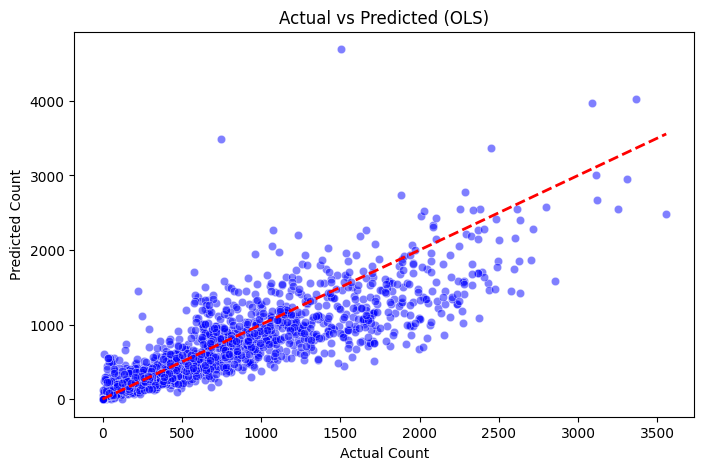

In [41]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_actual, y=y_pred, alpha=0.5, color='blue')
plt.plot([0, y_test_actual.max()], [0, y_test_actual.max()], '--r', linewidth=2) # Perfect prediction line
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted (OLS)')
plt.show()

The "Actual vs. Predicted" scatter plot serves as a visual reality check for our model's performance. Ideally, if the model were perfect, all points would lie exactly on the red diagonal line ($y=x$). In our plot, the points form a tight "cloud" around this line, which indicates that the model's predictions are generally accurate and follow the real trend. This specific shape—rather than a thin straight line—is actually a positive sign; it proves that the model has learned the underlying patterns of the data (generalization) without memorizing the noise (overfitting).

##Model Comparison (OLS, Ridge, Lasso, ElasticNet)

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [43]:
models = {
    "OLS (Baseline)": LinearRegression(),

    # Ridge (L2): Good for handling multicollinearity.
    # Alpha=10 is a safe starting point (standard regularization).
    "Ridge (L2)": Ridge(alpha=10),

    # Lasso (L1): Can set coefficients to zero (Feature Selection).
    # It is aggressive, so we use a small alpha (0.01) to prevent underfitting.
    "Lasso (L1)": Lasso(alpha=0.01),

    # ElasticNet: A compromise between Ridge and Lasso.
    # l1_ratio=0.5 means a 50/50 mix of L1 and L2 penalties.
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5)
}

print("Models Defined")

Models Defined


In [44]:
results = []

# Iterate through each model in our dictionary
for name, model in models.items():

    #Fit the model to the training data
    # Note: We use the log-transformed target (y_train_log)
    model.fit(X_train_scaled, y_train_log)

    #Make predictions on the test set
    y_pred_log = model.predict(X_test_scaled)

    # Inverse Log Transformation
    # We predicted log(1+y), so we must apply exp(y)-1 to get the real count
    y_pred = np.expm1(y_pred_log)

    #Calculate Evaluation Metrics
    r2 = r2_score(y_test_actual, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

    #Store the results
    results.append({
        'Model': name,
        'R2 Score': r2,
        'RMSE': rmse
    })

    print(f"{name} finished.")

# Create a DataFrame to display the leaderboard
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)

print("\n--- 🏆 Final Leaderboard 🏆 ---")
results_df

OLS (Baseline) finished.
Ridge (L2) finished.
Lasso (L1) finished.
ElasticNet finished.

--- 🏆 Final Leaderboard 🏆 ---


,Model,R2 Score,RMSE
0,OLS (Baseline),0.719765,341.700003
1,Ridge (L2),0.716235,343.845378
3,ElasticNet,0.622849,396.407144
2,Lasso (L1),0.585054,415.795083


#Scenario Testing

In [45]:
"""
import warnings
warnings.filterwarnings('ignore')
"""

In [48]:
my_scenario = {
    'Temperature': 25,       # Nice weather (25°C)
    'Humidity': 40,          # Comfortable humidity
    'Wind_Speed': 1.5,       # Light breeze
    'Visibility': 2000,      # Clear visibility
    'Dew_Point_Temp': 10,    # Standard value
    'Solar_Radiation': 1.0,  # Sunny
    'Rainfall': 0,           # No rain
    'Snowfall': 0,           # No snow
    'Year': 2018,            # Year
    'DayOfWeek': 2,          # Wednesday (0=Monday, 6=Sunday)
    'Seasons': 'Summer',     # Season category
    'Holiday': 'No Holiday', # Working day
    'Functioning_Day': 'Yes',# Rental system is active
    'Hour': 8,               # 08:00 AM (Peak traffic time!)
    'Month': 6               # June
}


# Convert to DataFrame & Preprocess
new_df = pd.DataFrame([my_scenario])

# Use .transform(), NOT .fit_transform()
# We apply the same scaling/encoding rules learned from the training set.
new_data_scaled = preprocessor.transform(new_df)

# Predict with all trained models
for name, model in models.items():
    # Get log-prediction
    pred_log = model.predict(new_data_scaled)

    # Inverse Transformation: Convert log(1+y) back to real count
    pred_real = np.expm1(pred_log)

    # Print result
    print(f"{name.ljust(20)}: {int(pred_real[0])} bikes")

OLS (Baseline)      : 3157 bikes
Ridge (L2)          : 3128 bikes
Lasso (L1)          : 2162 bikes
ElasticNet          : 2443 bikes


In [49]:
# Let's pick a specific index (e.g., Index 2500).
# You can change this number to check different days (You will see that not everyday works perfectly)
sample_index = 1000

# Get the full row (Features + Target)
real_sample_row = df.iloc[[sample_index]]

# Separate the Ground Truth (Actual Y)
actual_count = real_sample_row['Rented_Bike_Count'].values[0]

# Separate the Features (X) - We must remove the target column for prediction
input_features = real_sample_row.drop(['Rented_Bike_Count'], axis=1)

# Apply the same transformations (Scaling/Encoding)
input_scaled = preprocessor.transform(input_features)

# --- Compare Actual vs Models --
print(f"--- Index: {sample_index}) ---")
print(f"Context: {real_sample_row['Seasons'].values[0]}, Hour: {real_sample_row['Hour'].values[0]}")
print(f"--------------------------------------------------")
print(f"Real Count  : {actual_count} bikes")
print(f"--------------------------------------------------")

for name, model in models.items():
    # Predict
    pred_log = model.predict(input_scaled)
    pred_real = int(np.expm1(pred_log)[0]) # Inverse Log

    print(f"{name.ljust(20)}: {pred_real} bikes")

--- Index: 1000) ---
Context: Winter, Hour: 16
--------------------------------------------------
Real Count  : 179 bikes
--------------------------------------------------
OLS (Baseline)      : 182 bikes
Ridge (L2)          : 180 bikes
Lasso (L1)          : 190 bikes
ElasticNet          : 177 bikes
